In [2]:
import numpy as np
import scipy.constants as phy_const
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
import math
import os
import pandas as pd
import glob
import sys
import configparser

import MakePlots_Charoy as mplt_mod
import FLHET_compiled as FLHET_mod
from modules.simu_params import SimuParameters


In [3]:
dirname = os.getcwd()

## PLot variables

In [4]:
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'
tickfontsize    = 15
legendfontsize  = 18
axisfontsize    = 18
titlefontsize   = 20

## Test the programation of the magnetic field

Implemented in FLHET_compiled.py the magnetic field as it is in Thomas'S Charoy thesis:

$$
B(x) = a_k \exp{( -\frac{(x - x_{Bmax})^2}{2 \sigma_k^2} )} + b_k
$$
With $k = 1$ for $x \leq x_{Bmax}$ and $k = 2$ for $x > x_{Bmax}$.

In the script, the $a_k, b_k$ are calculated as function of input parameters which are:

* $B_{max}$, the maximum amplitude of the magnetic field, reached at $x = x_{Bmax}$.

* $B_{0}$, the magnetic field at $x = 0$.

* $B_{Lx}$, the magnetic field at $x = L_x$.

* The $\sigma_k$, lengthscales of B variation.

With these previous quantities:
$$ a_1 = \frac{B_{max} - B_0}{1 - \exp{(-\frac{x_{Bmax}^2}{2 \sigma_1^2})}} $$
$$ a_2 = \frac{B_{max} - B_{Lx}}{1 - \exp{(-\frac{(L_x - x_{Bmax})^2}{2 \sigma_2^2})}} $$
$$ b_1 = B_{max} - a_1 $$
$$ b_2 = B_{max} - a_2 $$


In [5]:
LX  = 0.0250
LTHR= 0.0075

In [6]:
BMAX= 10e-3 # Max Mag field
B0  = 6e-3  # Mag field at x=0
BLX = 1e-3  # Mag field at x=LX
LB1 = 0.25*LX  # Length for magnetic field
LB2 = 0.25*LX  # Length for magnetic field

In [7]:
NBPOINTS = 200
Delta_x = LX / NBPOINTS

In [8]:
x_center = np.linspace(Delta_x, LX - Delta_x, NBPOINTS)  # Mesh in the center of cell

In [9]:
a1 = (BMAX - B0)/(1 - math.exp(-LTHR**2/(2*LB1**2)))
a2 = (BMAX - BLX)/(1 - math.exp(-(LX - LTHR)**2/(2*LB2**2)))
b1 = BMAX - a1
b2 = BMAX - a2
Barr1 = a1*np.exp(-(x_center - LTHR)**2/(2*LB1**2)) + b1
Barr2 = a2*np.exp(-(x_center - LTHR)**2/(2*LB2**2)) + b2    # Magnetic field outside the thruster

Barr = np.where(x_center <= LTHR, Barr1, Barr2)

In [10]:
code_B100 = np.copy(Barr)
code_B050 = 0.5 * Barr
code_B150 = 1.5 * Barr
code_B200 = 2.0 * Barr

In [11]:
# imports Charoy's plot data
def conv(text):
    textstr = str(text)
    textstr.replace(',','.')

    try:
        f = float(textstr)
    except:
        return float('nan')
    else:
        return f

charoy_B050 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max050.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")
charoy_B100 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max100.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";") 
charoy_B150 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max150.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")
charoy_B200 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max200.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";") 


In [12]:
charoy_B100

array([[2.21978156e-02, 6.19036608e+01],
       [5.61570847e-02, 6.44214058e+01],
       [9.01158234e-02, 6.69624632e+01],
       [1.24075093e-01, 6.94802081e+01],
       [1.58034362e-01, 7.19979531e+01],
       [1.91992570e-01, 7.45623229e+01],
       [2.25951309e-01, 7.71033803e+01],
       [2.59911108e-01, 7.95978128e+01],
       [2.93873030e-01, 8.19989955e+01],
       [3.26291502e-01, 8.42789534e+01],
       [3.71069341e-01, 8.70111729e+01],
       [4.05036036e-01, 8.92025435e+01],
       [4.39009627e-01, 9.10908522e+01],
       [4.72985870e-01, 9.28625987e+01],
       [5.06965826e-01, 9.44711579e+01],
       [5.40950556e-01, 9.58699051e+01],
       [5.74938999e-01, 9.71054652e+01],
       [6.08932746e-01, 9.81079006e+01],
       [6.42930736e-01, 9.89238365e+01],
       [6.76934031e-01, 9.95066478e+01],
       [7.10945813e-01, 9.97164599e+01],
       [7.44955473e-01, 1.00019522e+02],
       [7.78978925e-01, 9.97164599e+01],
       [8.13000785e-01, 9.94833354e+01],
       [8.470321

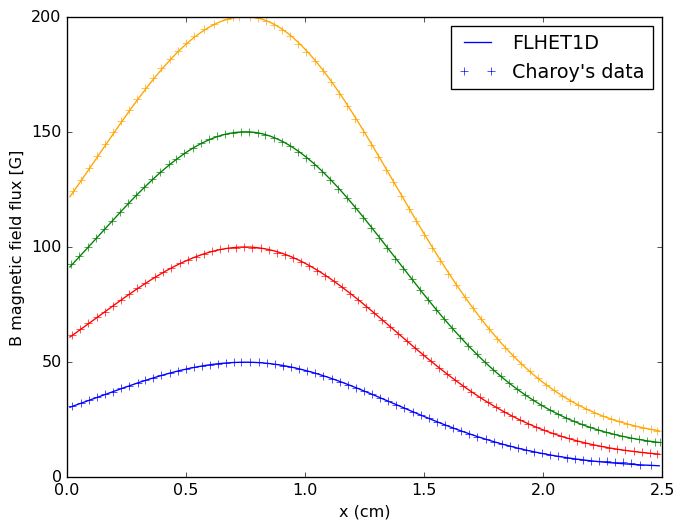

In [13]:
fig = plt.figure(figsize=(8,6), dpi=96)

plt.plot(x_center*100, code_B050*10000, 'b-', label='FLHET1D')
plt.plot(x_center*100, code_B100*10000, 'r-',)
plt.plot(x_center*100, code_B150*10000, 'g-')
plt.plot(x_center*100, code_B200*10000, '-', color='orange')

plt.plot(charoy_B050[:,0], charoy_B050[:,1], 'b+', label="Charoy's data")
plt.plot(charoy_B100[:,0], charoy_B100[:,1], 'r+')
plt.plot(charoy_B150[:,0], charoy_B150[:,1], 'g+')
plt.plot(charoy_B200[:,0], charoy_B200[:,1], '+', color= 'orange')

plt.xlabel("x (cm)")
plt.ylabel("B magnetic field flux [G]")
plt.legend()
plt.show()

## Test the ionization process

Implemented in FLHET_compiled.py the ionization profile as it is in Thomas'S Charoy thesis:

$$
S(x) = S_0 \cos{(\pi \frac{x - x_m}{x_2 - x_1})}
$$
For $x \in [x_1, x_2]$, and $S(x) = 0$ elsewhere.

With $x_m = \frac{x_1 + x_2}{2}$.


In [14]:
SIZMAX = 5.2e23
LSIZ1 = 0.0025
LSIZ2 = 0.0100

In [15]:
xm = (LSIZ1 + LSIZ2)/2
Siz_arr = SIZMAX*np.cos(math.pi*(x_center - xm)/(LSIZ2 - LSIZ1))
Siz_arr = np.where((x_center < LSIZ1)|(x_center > LSIZ2), 0., Siz_arr)

In [16]:
# imports Charoy's plot data
datacharoy = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/S_iz.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";") 

In [17]:
datacharoy

array([[ 2.41138626e-02, -7.55600570e-05],
       [ 5.62398947e-02, -1.01459823e-04],
       [ 9.20694682e-02, -7.21192669e-05],
       [ 1.15236152e-01, -7.09462702e-05],
       [ 1.60025074e-01, -6.86784767e-05],
       [ 1.84736203e-01, -6.74272803e-05],
       [ 2.31068149e-01, -4.00573586e-05],
       [ 2.47578402e-01, -1.27732659e-05],
       [ 2.55715452e-01,  1.08453362e-03],
       [ 2.63334147e-01,  2.90710974e-03],
       [ 2.72261023e-01,  5.00481130e-03],
       [ 2.78591575e-01,  6.19958099e-03],
       [ 2.89266040e-01,  8.60524071e-03],
       [ 2.99946630e-01,  1.09030890e-02],
       [ 3.06044258e-01,  1.23141258e-02],
       [ 3.14979048e-01,  1.42725572e-02],
       [ 3.22840292e-01,  1.57094401e-02],
       [ 3.28910394e-01,  1.76049402e-02],
       [ 3.35579444e-01,  2.10399609e-02],
       [ 3.38103950e-01,  1.88922649e-02],
       [ 3.56916191e-01,  2.17510476e-02],
       [ 3.60983836e-01,  2.39410770e-02],
       [ 3.68632361e-01,  2.52386459e-02],
       [ 3.

In [18]:
x_charoy = datacharoy[:, 0]
S_charoy = datacharoy[:, 1]

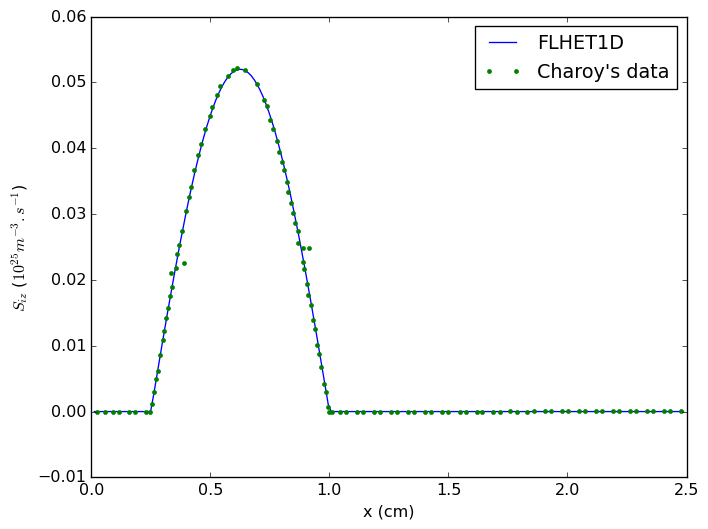

In [19]:
fig = plt.figure(figsize=(8,6), dpi=96)
plt.plot(x_center*100, Siz_arr/(1e25), label='FLHET1D')
plt.plot(x_charoy, S_charoy, marker='.', linestyle='', label="Charoy's data")
plt.xlabel("x (cm)")
plt.ylabel("$S_{iz}$ ($10^{25} m^{-3}.s^{-1}$)")
plt.legend()
plt.show()

In [20]:
# Calculations of the SIZMAX achieving the current from Charoy's thesis
current_Charoy = [50., 100., 200., 400.]    # in A/m2
SIZMAX_list = []
for cd in current_Charoy:
    sizmax_val = (cd * np.pi)/(phy_const.e * 2 * (LSIZ2 - LSIZ1))
    SIZMAX_list.append(sizmax_val)

In [21]:
print("Currents values [A/m2]", current_Charoy)
print("Corresponding SIZMAX values [/m3/s]", SIZMAX_list)

Currents values [A/m2] [50.0, 100.0, 200.0, 400.0]
Corresponding SIZMAX values [/m3/s] [6.536093018546655e+22, 1.307218603709331e+23, 2.614437207418662e+23, 5.228874414837324e+23]


## Different SIZMAX but same $\alpha_B$, comparison to Charoy's data

In [22]:
LX = 0.025
LTHR = 0.0075
LSIZ1 = 0.0025
LSIZ2 = 0.0100

x_mesh  = np.linspace(0., LX, 401, endpoint=True)
x_center= 0.5*(x_mesh[1:] + x_mesh[:-1])

SIZMAX1     = 6.5361e22 # corresponds to 50 A/m2.
SIZMAX2     = 1.3072e23 # corresponds to 100 A/m2.
SIZMAX3     = 2.6144e23 # corresponds to 200 A/m2.
SIZMAX4     = 5.2289e23 # corresponds to 400 A/m2.

Siz1    = FLHET_mod.compute_imposed_Siz(x_center, SIZMAX1, LSIZ1, LSIZ2)
Siz2    = FLHET_mod.compute_imposed_Siz(x_center, SIZMAX2, LSIZ1, LSIZ2)
Siz3    = FLHET_mod.compute_imposed_Siz(x_center, SIZMAX3, LSIZ1, LSIZ2)
Siz4    = FLHET_mod.compute_imposed_Siz(x_center, SIZMAX4, LSIZ1, LSIZ2)

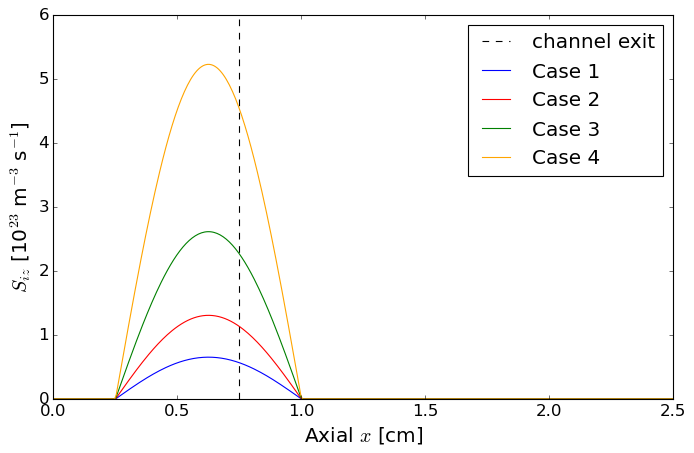

In [23]:
fig     = plt.figure(figsize=(10,6))
plt.plot([LTHR*100, LTHR*100], [0., 6.0], 'k--', label='channel exit')
plt.plot(x_center*100, Siz1/1e23, 'b-', label="Case 1")
plt.plot(x_center*100, Siz2/1e23, 'r-', label="Case 2")
plt.plot(x_center*100, Siz3/1e23, 'g-', label="Case 3")
plt.plot(x_center*100, Siz4/1e23, '-', color="orange", label="Case 4")
plt.xlim([0., 2.5])
plt.ylim([0., 6.])
plt.xticks(fontsize=tickfontsize)
plt.yticks(fontsize=tickfontsize)
plt.xlabel("Axial $x$ [cm]", fontsize=axisfontsize)
plt.ylabel("$S_{iz}$ [10$^{23}$ m$^{-3}$ s$^{-1}$]", fontsize=axisfontsize)
plt.legend(fontsize=legendfontsize)
plt.show()


In [24]:
ion_current_Charoy = [50., 100., 200., 400.]    # in A/m2

Jtot_Jion050_df = pd.read_csv("./Results_to_share/plot_digitizer_from_Charoy/Jtot_Jion050.csv", sep='\t', header=None, index_col=None, names=['x', 'J'], decimal=',')
print(Jtot_Jion050_df)
Jtot_Jion100_df = pd.read_csv("./Results_to_share/plot_digitizer_from_Charoy/Jtot_Jion100.csv", sep='\t', header=None, index_col=None, names=['x', 'J'], decimal=',')
Jtot_Jion200_df = pd.read_csv("./Results_to_share/plot_digitizer_from_Charoy/Jtot_Jion200.csv", sep='\t', header=None, index_col=None, names=['x', 'J'], decimal=',')
Jtot_Jion400_df = pd.read_csv("./Results_to_share/plot_digitizer_from_Charoy/Jtot_Jion400.csv", sep='\t', header=None, index_col=None, names=['x', 'J'], decimal=',')

total_current_charoy    = [np.mean(Jtot_Jion050_df['J']), np.mean(Jtot_Jion100_df['J']), np.mean(Jtot_Jion200_df['J']), np.mean(Jtot_Jion400_df['J'])]

total_current_fluid      = [95.1, 186.1, 362.5, 707.3]

           x          J
0   0.028179  62.926655
1   0.062195  62.909173
2   0.096212  62.891691
3   0.130228  62.874209
4   0.164245  62.856728
..       ...        ...
64  2.236182  59.930920
65  2.270199  59.913438
66  2.304215  59.895956
67  2.338232  59.878475
68  2.362967  60.237963

[69 rows x 2 columns]


<>:15: SyntaxWarning: invalid escape sequence '\i'
<>:15: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_7637/1960417284.py:15: SyntaxWarning: invalid escape sequence '\i'
  plt.plot([0., 800.], [0., 800.], 'k-', label="$J_d = e\int_0^{LX} S_{iz} dx$")


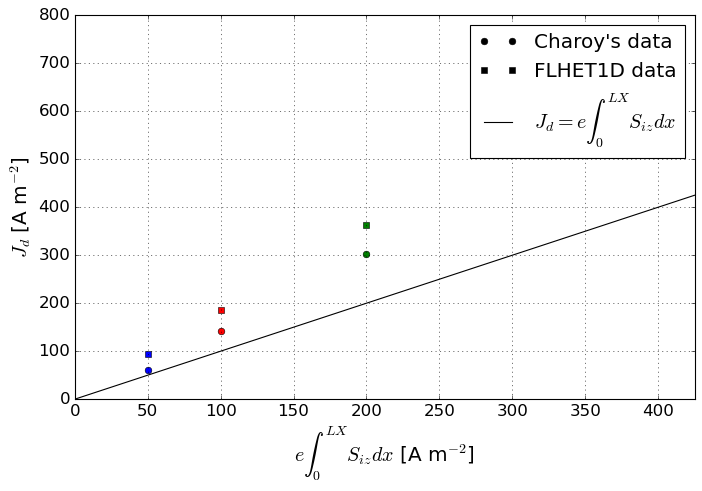

In [25]:
fig     = plt.figure(figsize=(10, 6))

plt.plot([ion_current_Charoy[0]], [total_current_charoy[0]], 'bo')
plt.plot([ion_current_Charoy[1]], [total_current_charoy[1]], 'ro')
plt.plot([ion_current_Charoy[2]], [total_current_charoy[2]], 'go')
plt.plot([ion_current_Charoy[3]], [total_current_charoy[3]], 'yo')
plt.plot([], [], 'ko', label="Charoy's data")

plt.plot([ion_current_Charoy[0]], [total_current_fluid[0]], 'bs')
plt.plot([ion_current_Charoy[1]], [total_current_fluid[1]], 'rs')
plt.plot([ion_current_Charoy[2]], [total_current_fluid[2]], 'gs')
plt.plot([ion_current_Charoy[3]], [total_current_fluid[3]], 'ys')
plt.plot([], [], 'ks', label="FLHET1D data")

plt.plot([0., 800.], [0., 800.], 'k-', label="$J_d = e\int_0^{LX} S_{iz} dx$")

plt.ylim([0., 800.])
plt.xlim([0., 425.])

plt.grid()

plt.xticks(fontsize=tickfontsize)
plt.yticks(fontsize=tickfontsize)

plt.xlabel("$e\\int_0^{LX} S_{iz} dx$ [A m$^{-2}$]", fontsize=axisfontsize)
plt.ylabel("$J_d$ [A m$^{-2}$]", fontsize=axisfontsize)
plt.legend(fontsize=legendfontsize)
plt.show()

## Comparison between simulation results to Charoy's

In [26]:
RESULTSDIR = './Results/charoy_checkcase_0_N400_no_hflux_no_coll/'
configFile = RESULTSDIR+'/Configuration.cfg'

In [41]:

msp = SimuParameters(configFile)

### Renames th variables for more clarity

Resultsdir  = msp.Results
MDOT    = msp.MDOT
Mi      = msp.Mi
A0      = msp.A0
VG      = msp.VG
NI0     = msp.NI0
TE0     = msp.TE0
ESTAR   = msp.ESTAR
wall_inter_type     = msp.wall_inter_type
R1      = msp.R1
R2      = msp.R2
LTHR    = msp.LTHR
KEL     = msp.KEL
TIMESCHEME  = msp.TIMESCHEME
TIMEFINAL   = msp.TIMEFINAL
SAVERATE    = msp.SAVERATE
boolIonColl = msp.boolIonColl
boolSizImposed  = msp.boolSizImposed
Eion        = msp.Eion
gamma_i     = msp.gamma_i
Te_inj        = msp.Te_inj
Rext        = msp.Rext
Te_Cath     = msp.Te_Cath
CFL         = msp.CFL
HEATFLUX    = msp.HEATFLUX
IMPlICIT    = msp.IMPlICIT
boolCircuit = msp.Circuit
V           = msp.V0


Default Magnetic Field
The ionization source term is imposed as specified in T.Charoy's thesis, section 2.2.2.


In [42]:
##########################################################
#           Make the plots
##########################################################

ResultsFigs = RESULTSDIR+"/Figs_vs_Charoy"
ResultsData = RESULTSDIR+"/Data"

if not os.path.exists(ResultsFigs):
    os.makedirs(ResultsFigs)


In [43]:
# open all the files in the directory and sort them to do the video in order
files       = glob.glob(ResultsData + "/MacroscopicVars_*.pkl")
filesSorted = sorted(files, key = lambda x: os.path.getmtime(x), reverse=True)
files.sort(key=os.path.getmtime)


Current = np.zeros(np.shape(files)[0])
Voltage = np.zeros(np.shape(files)[0])
time    = np.zeros(np.shape(files)[0])

# Open single file

In [ ]:
#####################################
#           Plot variables
#####################################

i_save = -1
file = files[i_save]
with open(file, 'rb') as f:
    [t, P, U, P_Inlet, P_Outlet, J, V, B, x_center] = pickle.load(f)

# Save the current
Current[i_save] = J
Voltage[i_save] = V
time[i_save]    = t

ValueError: not enough values to unpack (expected 9, got 7)

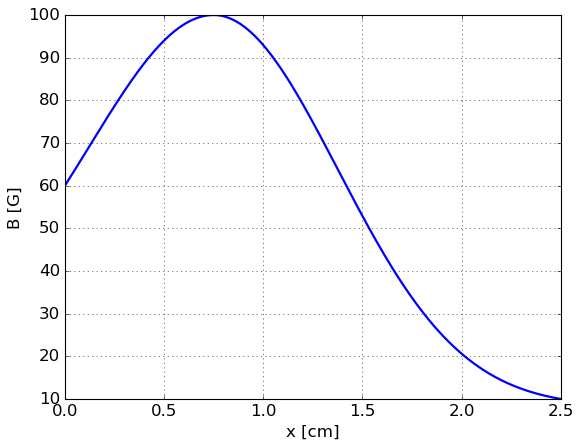

In [ ]:
f, axs = plt.subplots()
axs.plot(x_center*100, B*1e4)
axs.set_ylabel('B [G]')
axs.set_xlabel('x [cm]')
axs.grid(True)

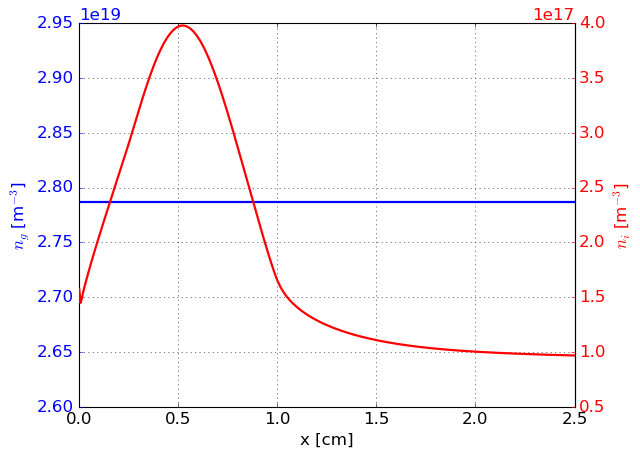

In [ ]:
f, axs = plt.subplots()

ax_n_i=axs.twinx()

axs.plot(x_center*100, P[0,:])

ax_n_i.plot(x_center*100, P[1,:], 'r')

ax_n_i.set_frame_on(True)
ax_n_i.patch.set_visible(False)

plt.setp(ax_n_i.spines.values(), visible=False)
ax_n_i.spines["right"].set_visible(True)



axs.set_ylabel('$n_g$ [m$^{-3}$]')
ax_n_i.set_ylabel('$n_i$ [m$^{-3}$]')

axs.set_xlabel('x [cm]')

axs.yaxis.label.set_color('b')
axs.tick_params(axis='y', colors='b')

ax_n_i.yaxis.label.set_color('r')
ax_n_i.tick_params(axis='y', colors='r')

axs.grid(True)

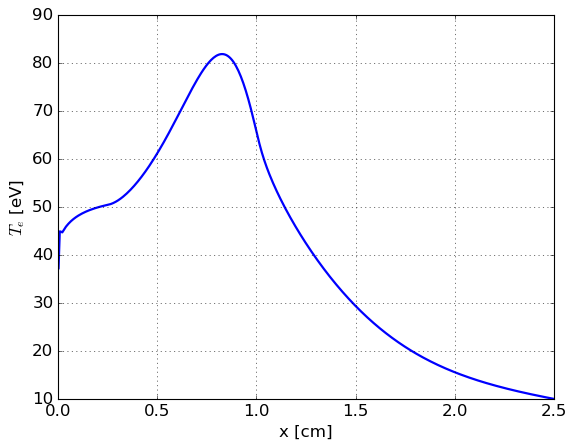

In [ ]:
f, axs = plt.subplots()

axs.plot(x_center*100, P[3,:])

axs.set_ylabel('$T_e$ [eV]')
axs.set_xlabel('x [cm]')

axs.grid(True)

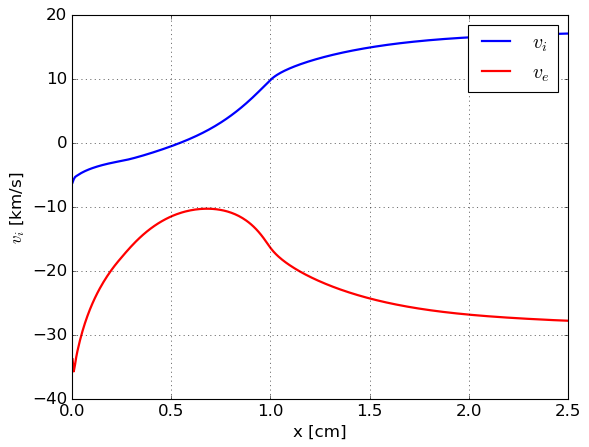

In [ ]:
f, axs = plt.subplots()

axs.plot(x_center*100, P[2,:]/1000, label="$v_i$")

axs.plot(x_center*100, P[4,:]/1000, 'r', label="$v_e$")

axs.set_ylabel('$v_i$ [km/s]')
axs.set_xlabel('x [cm]')

axs.legend()
axs.grid(True)

# Open single file and Comparison with Charoy digitized plots.

## Preliminary charts

In [44]:
# Collecting data from Charoy's thesis. These are digitized data from screen of figures. Made with WebPlotDigitizer.
Ex_charoy = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/Ex_B100.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")
ni_charoy = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/ni_B100.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")

In [45]:
Ex_charoy

array([[ 0.10857, -0.00804],
       [ 0.14933,  0.01345],
       [ 0.19009,  0.03241],
       [ 0.22666,  0.0619 ],
       [ 0.27181, -0.02359],
       [ 0.31283, -0.13043],
       [ 0.35169, -0.08901],
       [ 0.3979 , -0.01201],
       [ 0.43845,  0.11935],
       [ 0.47706,  0.28594],
       [ 0.50821,  0.47943],
       [ 0.53192,  0.67914],
       [ 0.55189,  0.89793],
       [ 0.56815,  1.11323],
       [ 0.58255,  1.33222],
       [ 0.59803,  1.5692 ],
       [ 0.61239,  1.80895],
       [ 0.62748,  2.05608],
       [ 0.64   ,  2.28662],
       [ 0.65438,  2.51715],
       [ 0.66876,  2.74768],
       [ 0.68557,  2.99664],
       [ 0.69859,  3.22902],
       [ 0.71184,  3.46694],
       [ 0.72622,  3.69747],
       [ 0.74069,  3.88417],
       [ 0.75877,  4.1139 ],
       [ 0.78394,  4.5181 ],
       [ 0.80209,  4.7163 ],
       [ 0.82759,  4.9502 ],
       [ 0.86258,  5.07185],
       [ 0.90356,  4.98766],
       [ 0.93547,  4.7952 ],
       [ 0.95443,  4.58594],
       [ 0.967

In [46]:
def cumTrapz_from_custom_x(y, x):
    assert(x.shape == y.shape)
    cuminteg = np.zeros(y.shape, dtype=float)
    n = y.shape[0]
    for i in range(1, n):
        d = x[i] - x[i-1]
        cuminteg[i] = cuminteg[i-1] + d * (y[i] + y[i-1]) / 2

    return cuminteg

In [47]:
phi_charoy = 200. - cumTrapz_from_custom_x(Ex_charoy[:, 1]*10000, Ex_charoy[:, 0]/100)

In [48]:
phi_charoy

array([ 2.00000000e+02,  1.99988974e+02,  1.99895512e+02,  1.99723066e+02,
        1.99636581e+02,  1.99952476e+02,  2.00378848e+02,  2.00612255e+02,
        2.00394623e+02,  1.99612211e+02,  1.98420147e+02,  1.97046662e+02,
        1.95471958e+02,  1.93836885e+02,  1.92076161e+02,  1.89830461e+02,
        1.87404950e+02,  1.84488785e+02,  1.81770254e+02,  1.78316344e+02,
        1.74530931e+02,  1.69702830e+02,  1.65649925e+02,  1.61213852e+02,
        1.56062641e+02,  1.50577325e+02,  1.43347069e+02,  1.32483697e+02,
        1.24103479e+02,  1.11778692e+02,  9.42451153e+01,  7.36331793e+01,
        5.80246262e+01,  4.91313055e+01,  4.31245873e+01,  3.72659348e+01,
        3.01451282e+01,  2.47272176e+01,  2.22262939e+01,  2.06246483e+01,
        1.89919940e+01,  1.74286602e+01,  1.56474251e+01,  1.33269682e+01,
        1.09778937e+01,  8.18431595e+00,  6.41008685e+00,  4.98672685e+00,
        3.80717302e+00,  2.75540008e+00,  1.78373480e+00,  9.03732980e-01,
        1.36423040e-01, -

In [49]:
#####################################
#           Plot variables
#####################################

i_save = -1
file = files[i_save]
with open(file, 'rb') as f:
    [t, P, U, P_Inlet, P_Outlet, J, Ex_fluid] = pickle.load(f)

with open(ResultsData+"/MacroscopicUnvariants.pkl", 'rb') as f:
    [Barr, x_mesh, x_center, alpha_B] = pickle.load(f)
Delta_x = x_mesh[1:] - x_mesh[:-1]

In [50]:
phi_fluid = mplt_mod.compute_phi(Ex_fluid, Delta_x, J, V, Rext)

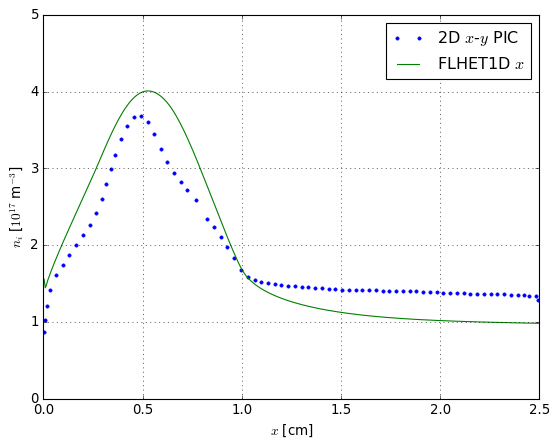

In [51]:
f, axs = plt.subplots()

axs.plot(ni_charoy[:,0], ni_charoy[:,1], '.', label="2D $x$-$y$ PIC")
axs.plot(x_center*100, P[1,:]/1e17, '-', label="FLHET1D $x$")
axs.set_ylim([0., 5.0])
axs.set_xlabel("$x$ [cm]")
axs.set_ylabel("$n_i$ [$10^{17}$ m$^{-3}$]")

axs.grid(True)
axs.legend()

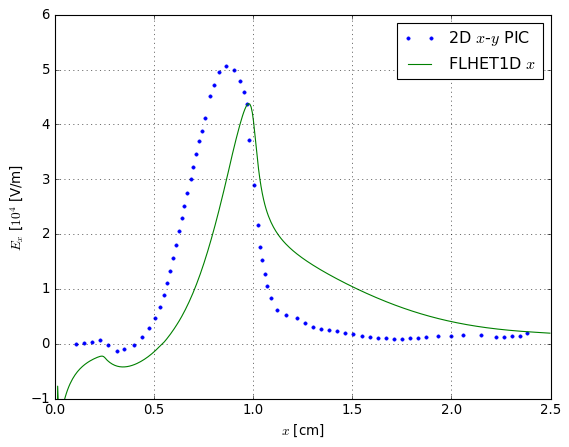

In [52]:
f, axs = plt.subplots()

axs.plot(Ex_charoy[:,0], Ex_charoy[:,1], '.', label="2D $x$-$y$ PIC")
axs.plot(x_center*100, Ex_fluid/10000, '-', label="FLHET1D $x$")
axs.set_ylim([-1.0, 6.0])
axs.set_xlabel("$x$ [cm]")
axs.set_ylabel("$E_x$ [$10^{4}$ [V/m]")

axs.grid()
axs.legend()

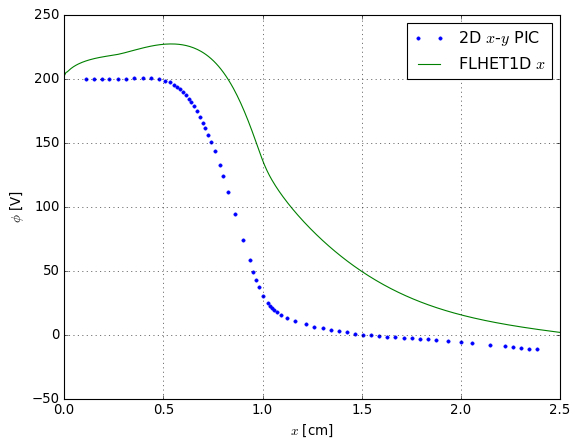

In [53]:
f, axs = plt.subplots()

axs.plot(Ex_charoy[:,0], phi_charoy, '.', label="2D $x$-$y$ PIC")
axs.plot(x_center*100, phi_fluid, '-', label="FLHET1D $x$")

axs.set_xlabel("$x$ [cm]")
axs.set_ylabel("$\\phi$ [V]")

axs.grid()
axs.legend()

Comparison of electronic temperature. Warning: the data from Charoy's thesis with regard to $T_e$ is not from the 4th Chapter, because he does not display this curve. But since B=100 G and J = 400 A $m^{-2}$ is the nominal case of 3rd Chapter benchmark, I took $T_e$ from Figure 3.7 (LPP's curve).

In [54]:
Te_benchmark = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/Te_from_benchmark.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")

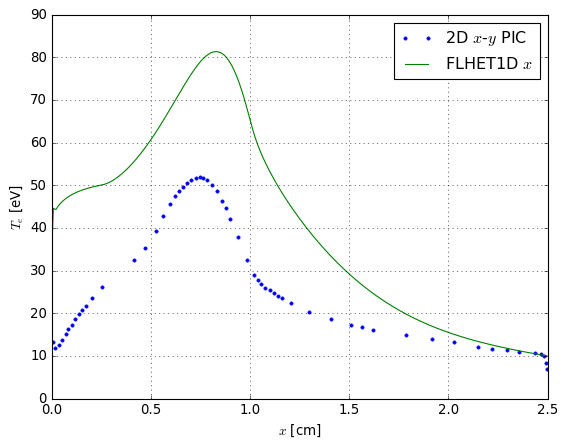

In [55]:
f, axs = plt.subplots()

axs.plot(Te_benchmark[:,0], Te_benchmark[:,1], '.', label="2D $x$-$y$ PIC")
axs.plot(x_center*100, P[3,:], '-', label="FLHET1D $x$")

axs.set_xlabel("$x$ [cm]")
axs.set_ylabel("$T_e$ [eV]")

axs.grid()
axs.legend()

## The plot of the report 

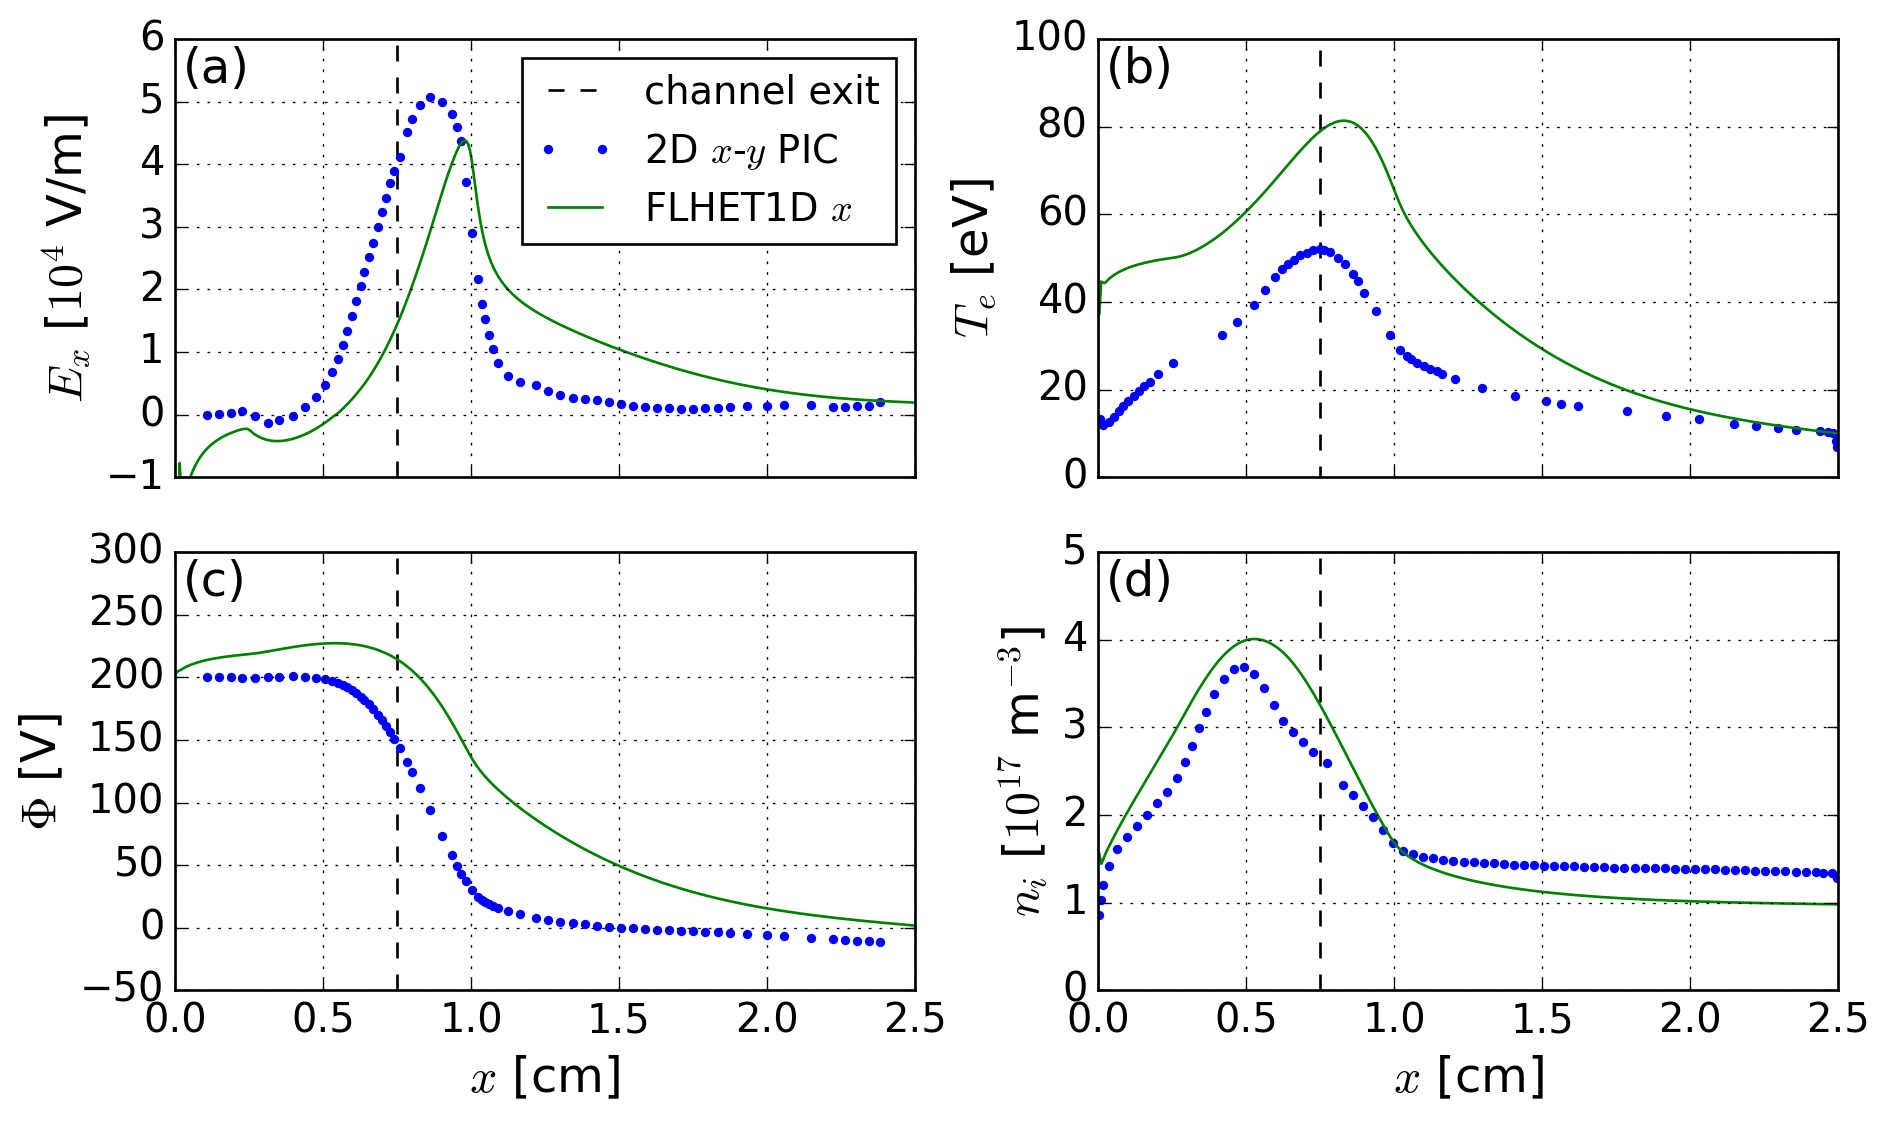

In [56]:
f, axs = plt.subplots(2,2, figsize=(10,6), dpi=192)

axs[0, 0].plot([LTHR*100, LTHR*100], [-1.0, 6.0], 'k--', label="channel exit")
axs[0, 0].plot(Ex_charoy[:,0], Ex_charoy[:,1], '.', label="2D $x$-$y$ PIC")
axs[0, 0].plot(x_center*100, Ex_fluid/10000, '-', label="FLHET1D $x$")
axs[0, 0].set_ylim([-1.0, 6.0])
axs[0, 0].set_xlim([0., 2.5])
axs[0, 0].text(0.025, 5.3, '(a)', fontsize=legendfontsize)
axs[0, 0].set_xticklabels([])
axs[0, 0].yaxis.set_tick_params(labelsize=tickfontsize)
axs[0, 0].set_ylabel("$E_x$ [$10^{4}$ V/m]", fontsize=axisfontsize)
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot([LTHR*100, LTHR*100], [-1.0, 100.], 'k--')
axs[0, 1].plot(Te_benchmark[:,0], Te_benchmark[:,1], '.')
axs[0, 1].plot(x_center*100, P[3,:], '-')
axs[0, 1].set_xlim([0., 2.5])
axs[0, 1].set_ylim([0., 100.])
axs[0, 1].text(0.025, 90., '(b)', fontsize=legendfontsize)
axs[0, 1].set_xticklabels([])
axs[0, 1].yaxis.set_tick_params(labelsize=tickfontsize)
axs[0, 1].set_ylabel("$T_e$ [eV]", fontsize=axisfontsize)
axs[0, 1].grid()

axs[1, 0].plot([LTHR*100, LTHR*100], [-50., 300.], 'k--')
axs[1, 0].plot(Ex_charoy[:,0], phi_charoy, '.')
axs[1, 0].plot(x_center*100, phi_fluid, '-')
axs[1, 0].set_ylim([-50., 300.])
axs[1, 0].set_xlim([0., 2.5])
axs[1, 0].text(0.025, 265., '(c)', fontsize=legendfontsize)
axs[1, 0].set_xlabel("$x$ [cm]")
axs[1, 0].set_ylabel("$\\phi$ [V]")
axs[1, 0].xaxis.set_tick_params(labelsize=tickfontsize)
axs[1, 0].yaxis.set_tick_params(labelsize=tickfontsize)
axs[1, 0].set_xlabel("$x$ [cm]", fontsize=axisfontsize)
axs[1, 0].set_ylabel("$\\Phi$ [V]", fontsize=axisfontsize)
axs[1, 0].grid()

axs[1, 1].plot([LTHR*100, LTHR*100], [0., 5.], 'k--')
axs[1, 1].plot(ni_charoy[:,0], ni_charoy[:,1], '.')
axs[1, 1].plot(x_center*100, P[1,:]/1e17, '-')
axs[1, 1].set_xlim([0., 2.5])
axs[1, 1].set_ylim([0., 5.0])
axs[1, 1].text(0.025, 4.5, '(d)', fontsize=legendfontsize)
axs[1, 1].xaxis.set_tick_params(labelsize=tickfontsize)
axs[1, 1].yaxis.set_tick_params(labelsize=tickfontsize)
axs[1, 1].set_xlabel("$x$ [cm]", fontsize=axisfontsize)
axs[1, 1].set_ylabel("$n_i$ [$10^{17}$ m$^{-3}$]", fontsize=axisfontsize)
axs[1, 1].grid()

plt.tight_layout()
plt.show()